In [ ]:
#PROBLEM STATEMENT Solve in ipynb:

Import the dataset. https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++
https://archive.ics.uci.edu/ml/machine-learning-databases/00547/

Do proper EDA(analysis) of your dataset and create a report from your dataset In EDA you are supposed to follow the given steps. Create a detailed profile of the dataset Perform graph based analysis Find out statistical insight from the data.

Then perform necessary preprocessing steps like If in the data there is missing value try to handle those missing values If there is categorical data try to encode it If there is imbalance data try to handle it If variation is too high try to scale your dataset If there is any outlier try to handle in a best possible way If there is any multicolinity in the dataset handle those variable

NOTE: best approach will be appreciated.

Then create a classification and regression model for a given dataset.For the regression model try to consider the numeric feature as the target variable.For classification variables try to consider a categorical variable as a target variable(this will be based on your understanding)

For regression use linear regression, ridge regression and lasso regression, SVR, Decision tree regressor and random forest regressor along with cross validation and hyperparameter tuning.Try to showcase the MSE value for each model and try to find out the best possible model based on the R2 value.

In classification models try to use logistic regression, SVM, decision tree, naive bayes and random forest along with hyperparameter tuning and cross validation and print your classification report and showcase the best possible model based on that report.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"D:\Personal\DATA SCIENEC STUFF\iNeuron Doc\ML Live class\ML CLASS KRISH\Challenegs\Algerian_forest_fires_dataset_UPDATE.csv")
df.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In [3]:
df.columns

Index(['Bejaia Region Dataset '], dtype='object')

In [4]:
df=pd.read_csv(r"C:\Users\USER\iNeuron_cls_stuff\ML Krish\Challenegs\Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [7]:
df[['day']]

,day
0,01
1,02
2,03
3,04
4,05
...,...
241,26
242,27
243,28
244,29


In [8]:
print(df[df['day'].isnull()])

Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  ]
Index: []


In [9]:
df['day'] = pd.to_numeric(df['day'], errors='coerce') 
df['month'] = pd.to_numeric(df['month'], errors='coerce') 
df['year'] = pd.to_numeric(df['year'], errors='coerce') 
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce') 
df[' RH'] = pd.to_numeric(df[' RH'], errors='coerce') 
df[' Ws'] = pd.to_numeric(df[' Ws'], errors='coerce') 
df['Rain '] = pd.to_numeric(df['Rain '], errors='coerce') 
df['FFMC'] = pd.to_numeric(df['FFMC'], errors='coerce') 
df['DMC'] = pd.to_numeric(df['DMC'], errors='coerce') 
df['DC'] = pd.to_numeric(df['DC'], errors='coerce') 
df['ISI'] = pd.to_numeric(df['ISI'], errors='coerce') 
df['BUI'] = pd.to_numeric(df['BUI'], errors='coerce') 
df['FWI'] = pd.to_numeric(df['FWI'], errors='coerce')

In [10]:
df = df.dropna(subset=['day'])
df = df.dropna(subset=['month'])
df = df.dropna(subset=['year'])
df = df.dropna(subset=['Temperature'])
df = df.dropna(subset=[' RH'])
df = df.dropna(subset=[' Ws'])
df = df.dropna(subset=['Rain '])
df = df.dropna(subset=['FFMC'])
df = df.dropna(subset=['DMC'])
df = df.dropna(subset=['DC'])
df = df.dropna(subset=['ISI'])
df = df.dropna(subset=['BUI'])
df = df.dropna(subset=['day'])

In [11]:
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df['Temperature'] = df['Temperature'].astype(int)
df[' RH'] = df[' RH'].astype(int)
df[' Ws'] = df[' Ws'].astype(int)
df['Rain '] = df['Rain '].astype(int)
df['FFMC'] = df['FFMC'].astype(int)
df['DMC'] = df['DMC'].astype(int)
df['DC'] = df['DC'].astype(int)
df['ISI'] = df['ISI'].astype(int)
df['BUI'] = df['BUI'].astype(int)
df['FWI'] = df['FWI'].astype(int)

In [12]:
df.dtypes

day             int32
month           int32
year            int32
Temperature     int32
 RH             int32
 Ws             int32
Rain            int32
FFMC            int32
DMC             int32
DC              int32
ISI             int32
BUI             int32
FWI             int32
Classes        object
dtype: object

In [13]:
df['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [14]:
df[['Classes  ']]

,Classes
0,not fire
1,not fire
2,not fire
3,not fire
4,not fire
...,...
241,fire
242,not fire
243,not fire
244,not fire


In [15]:
df['Classes  ']=df['Classes  '].map({'not fire   ':0,'fire   ':1,'fire':1,'not fire':0,'not fire ':0,'not fire     ':0,'fire ':1})


In [16]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
 RH              int32
 Ws              int32
Rain             int32
FFMC             int32
DMC              int32
DC               int32
ISI              int32
BUI              int32
FWI              int32
Classes        float64
dtype: object

In [17]:
df['Classes  '] = pd.to_numeric(df['Classes  '], errors='coerce') 
df = df.dropna(subset=['Classes  '])
df['Classes  '] = df['Classes  '].astype(int)

In [18]:
df.dtypes

day            int32
month          int32
year           int32
Temperature    int32
 RH            int32
 Ws            int32
Rain           int32
FFMC           int32
DMC            int32
DC             int32
ISI            int32
BUI            int32
FWI            int32
Classes        int32
dtype: object

In [19]:
#Summarize the Dataset
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [20]:
#Dimensions of Dataset
print(df.shape)

(242, 14)


In [21]:
# Peek at the Data
print(df.head(20))

    day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI  \
0     1      6  2012           29   57   18      0    65    3   7    1    3   
1     2      6  2012           29   61   13      1    64    4   7    1    3   
2     3      6  2012           26   82   22     13    47    2   7    0    2   
3     4      6  2012           25   89   13      2    28    1   6    0    1   
4     5      6  2012           27   77   16      0    64    3  14    1    3   
5     6      6  2012           31   67   14      0    82    5  22    3    7   
6     7      6  2012           33   54   13      0    88    9  30    6   10   
7     8      6  2012           30   73   15      0    86   12  38    5   13   
8     9      6  2012           25   88   13      0    52    7  38    0   10   
9    10      6  2012           28   79   12      0    73    9  46    1   12   
10   11      6  2012           31   65   14      0    84   12  54    4   15   
11   12      6  2012           26   81   19      0  

In [22]:
#Statistical Summary
# descriptions
print(df.describe())

              day       month    year  Temperature          RH          Ws  \
count  242.000000  242.000000   242.0   242.000000  242.000000  242.000000   
mean    15.702479    7.495868  2012.0    32.185950   62.033058   15.495868   
std      8.813084    1.112912     0.0     3.597274   14.858354    2.817032   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.250000   14.000000   
50%     16.000000    7.500000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.750000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

            Rain         FFMC         DMC          DC         ISI         BUI  \
count  242.000000  242.000000  242.000000  242.000000  242.000000  242.000000   
mean     0.603306   77.446281   14.256198   49.157025    4.342975   16.272727   
std      1.919454   14.384149   12.395642   47.730834 

In [ ]:
#Statistical Summary We can see that all of the numerical values have the same count) and similar ranges between 0 and 16

In [23]:
#Class Distribution
print(df.groupby('Classes  ').size())

Classes  
0    105
1    137
dtype: int64


In [ ]:
#Data Visualization two types of plots:

#1.Univariate plots to better understand each attribute. 
#2.Multivariate plots to better understand the relationships between attributes.

day               AxesSubplot(0.125,0.749828;0.133621x0.130172)
month          AxesSubplot(0.285345,0.749828;0.133621x0.130172)
year            AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Temperature    AxesSubplot(0.606034,0.749828;0.133621x0.130172)
 RH            AxesSubplot(0.766379,0.749828;0.133621x0.130172)
 Ws               AxesSubplot(0.125,0.593621;0.133621x0.130172)
Rain           AxesSubplot(0.285345,0.593621;0.133621x0.130172)
FFMC            AxesSubplot(0.44569,0.593621;0.133621x0.130172)
DMC            AxesSubplot(0.606034,0.593621;0.133621x0.130172)
DC             AxesSubplot(0.766379,0.593621;0.133621x0.130172)
ISI               AxesSubplot(0.125,0.437414;0.133621x0.130172)
BUI            AxesSubplot(0.285345,0.437414;0.133621x0.130172)
FWI             AxesSubplot(0.44569,0.437414;0.133621x0.130172)
Classes        AxesSubplot(0.606034,0.437414;0.133621x0.130172)
dtype: object

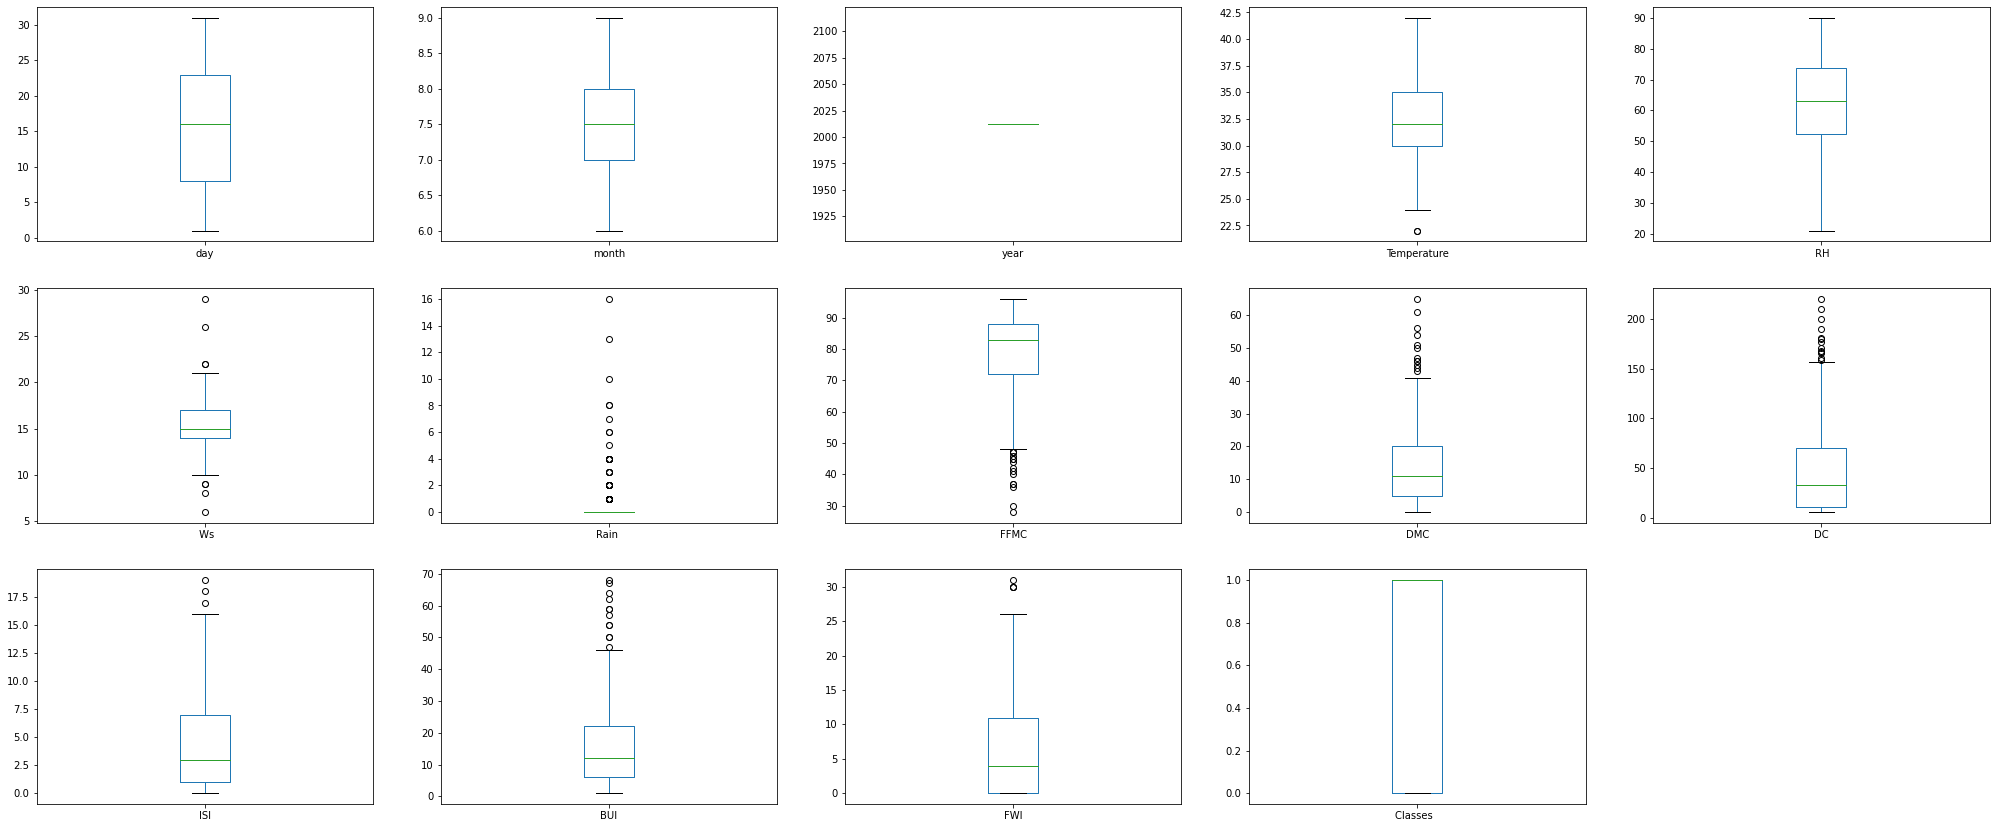

In [24]:
#Univariate Plots
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,figsize=(35,25))
#This gives us a much clearer idea of the distribution of the input attributes:

' It looks like perhaps two of the input variables Temperature and RH have a Gaussian distribution. \nThis is useful to note as we can use algorithms that can exploit this assumption.'

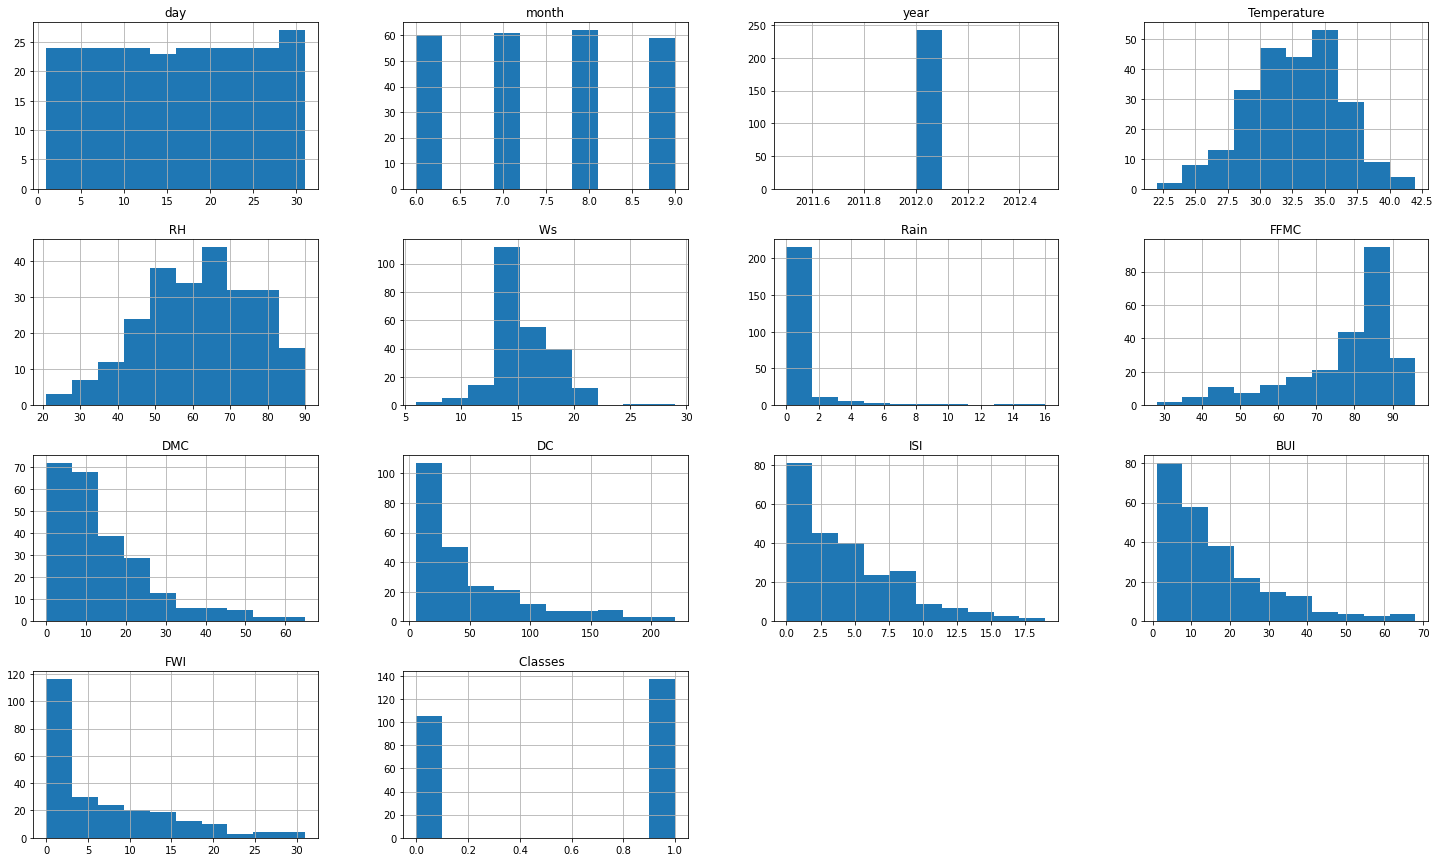

In [25]:
# histograms

df.hist(column=None, by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=(25,15), layout=None, bins=10, backend=None,legend=False)
""" It looks like perhaps two of the input variables Temperature and RH have a Gaussian distribution. 
This is useful to note as we can use algorithms that can exploit this assumption."""

In [ ]:
#From the above results we can see two of the input variables Temperature and RH have a Gaussian distribution.

In [ ]:
#Multivariate Plots #To get interactions between the variables. #scatterplots of all pairs of attributes. 
#This can be helpful to spot structured relationships between input variables.

array([[<AxesSubplot:xlabel='day', ylabel='day'>,
        <AxesSubplot:xlabel='month', ylabel='day'>,
        <AxesSubplot:xlabel='year', ylabel='day'>,
        <AxesSubplot:xlabel='Temperature', ylabel='day'>,
        <AxesSubplot:xlabel=' RH', ylabel='day'>,
        <AxesSubplot:xlabel=' Ws', ylabel='day'>,
        <AxesSubplot:xlabel='Rain ', ylabel='day'>,
        <AxesSubplot:xlabel='FFMC', ylabel='day'>,
        <AxesSubplot:xlabel='DMC', ylabel='day'>,
        <AxesSubplot:xlabel='DC', ylabel='day'>,
        <AxesSubplot:xlabel='ISI', ylabel='day'>,
        <AxesSubplot:xlabel='BUI', ylabel='day'>,
        <AxesSubplot:xlabel='FWI', ylabel='day'>,
        <AxesSubplot:xlabel='Classes  ', ylabel='day'>],
       [<AxesSubplot:xlabel='day', ylabel='month'>,
        <AxesSubplot:xlabel='month', ylabel='month'>,
        <AxesSubplot:xlabel='year', ylabel='month'>,
        <AxesSubplot:xlabel='Temperature', ylabel='month'>,
        <AxesSubplot:xlabel=' RH', ylabel='month'>,
        <

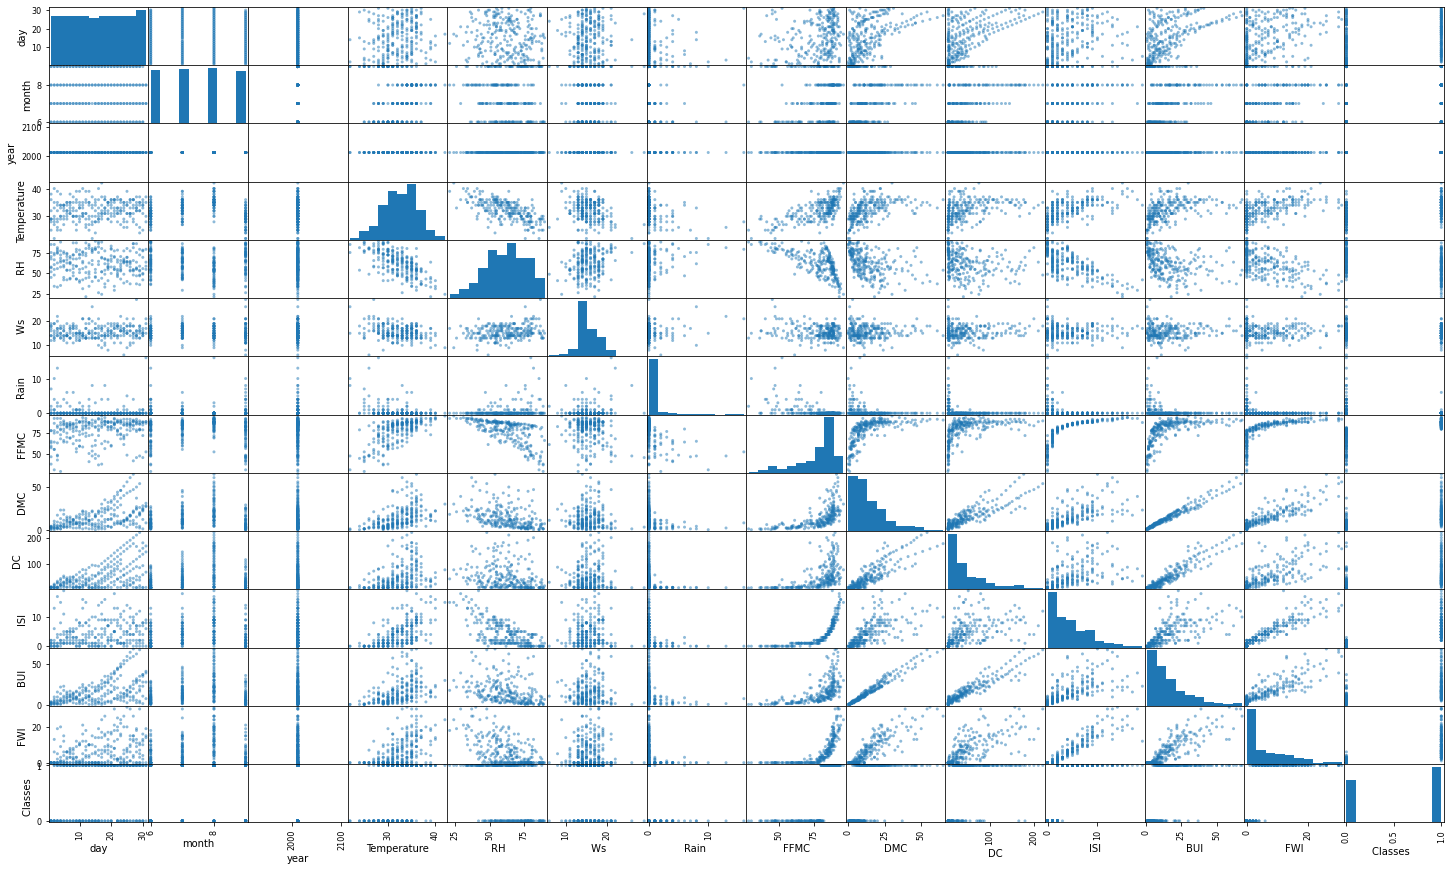

In [26]:
# scatter plot matrix

scatter_matrix(df, alpha=0.5, figsize=(25,15), ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05)

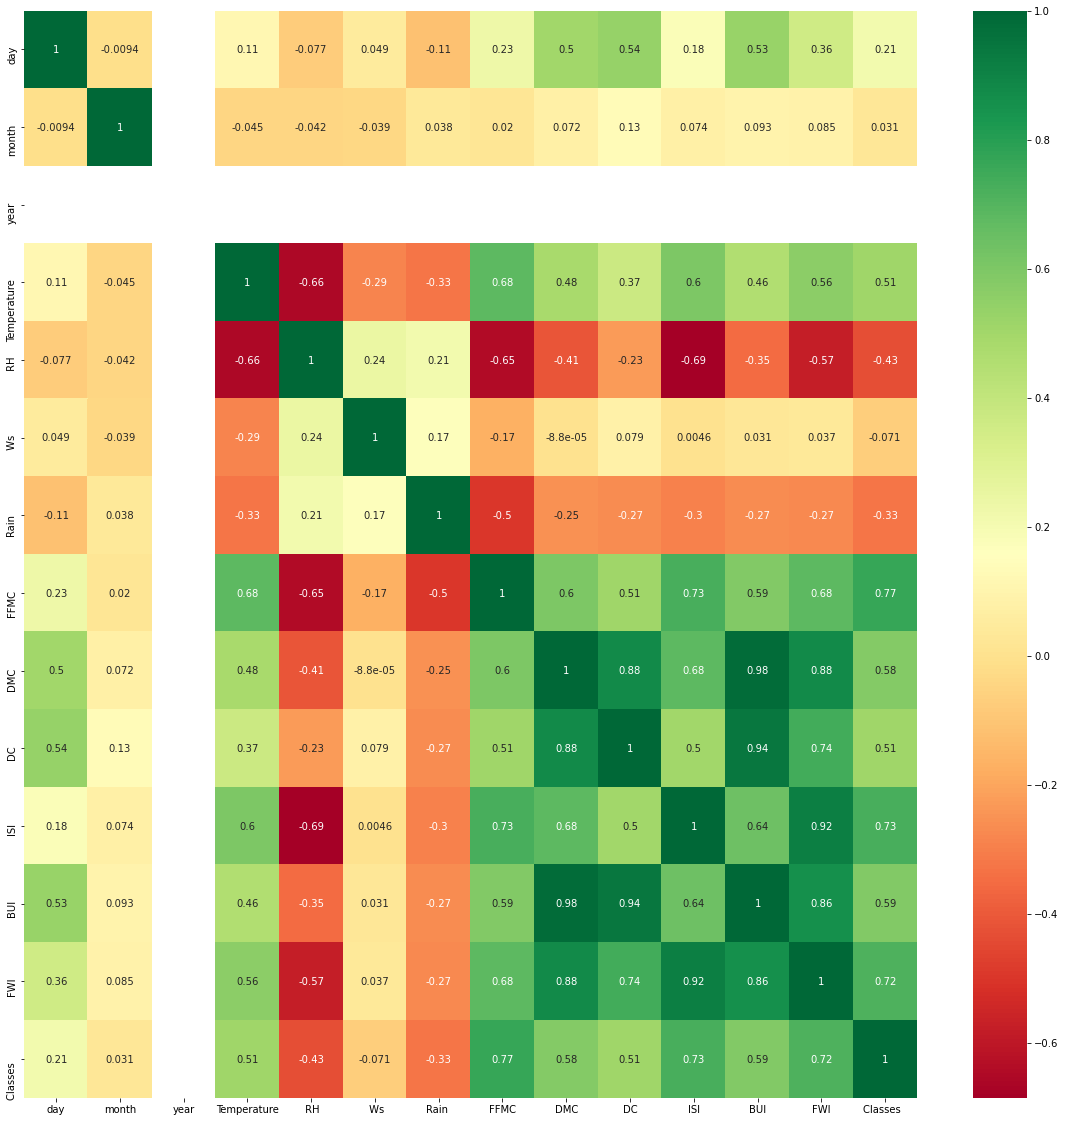

In [27]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Here from Heat map we can conclude that year is no more correlation with any other feature, so we can drop, 

<AxesSubplot:xlabel='Temperature', ylabel='Rain '>

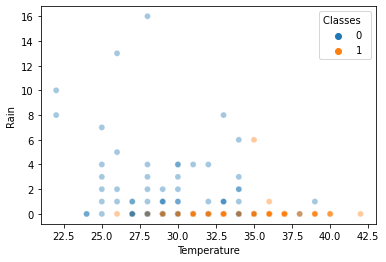

In [28]:
sns.scatterplot(x='Temperature', y= 'Rain ', data =df, hue = 'Classes  ', alpha = 0.4)

<Figure size 1440x1440 with 0 Axes>

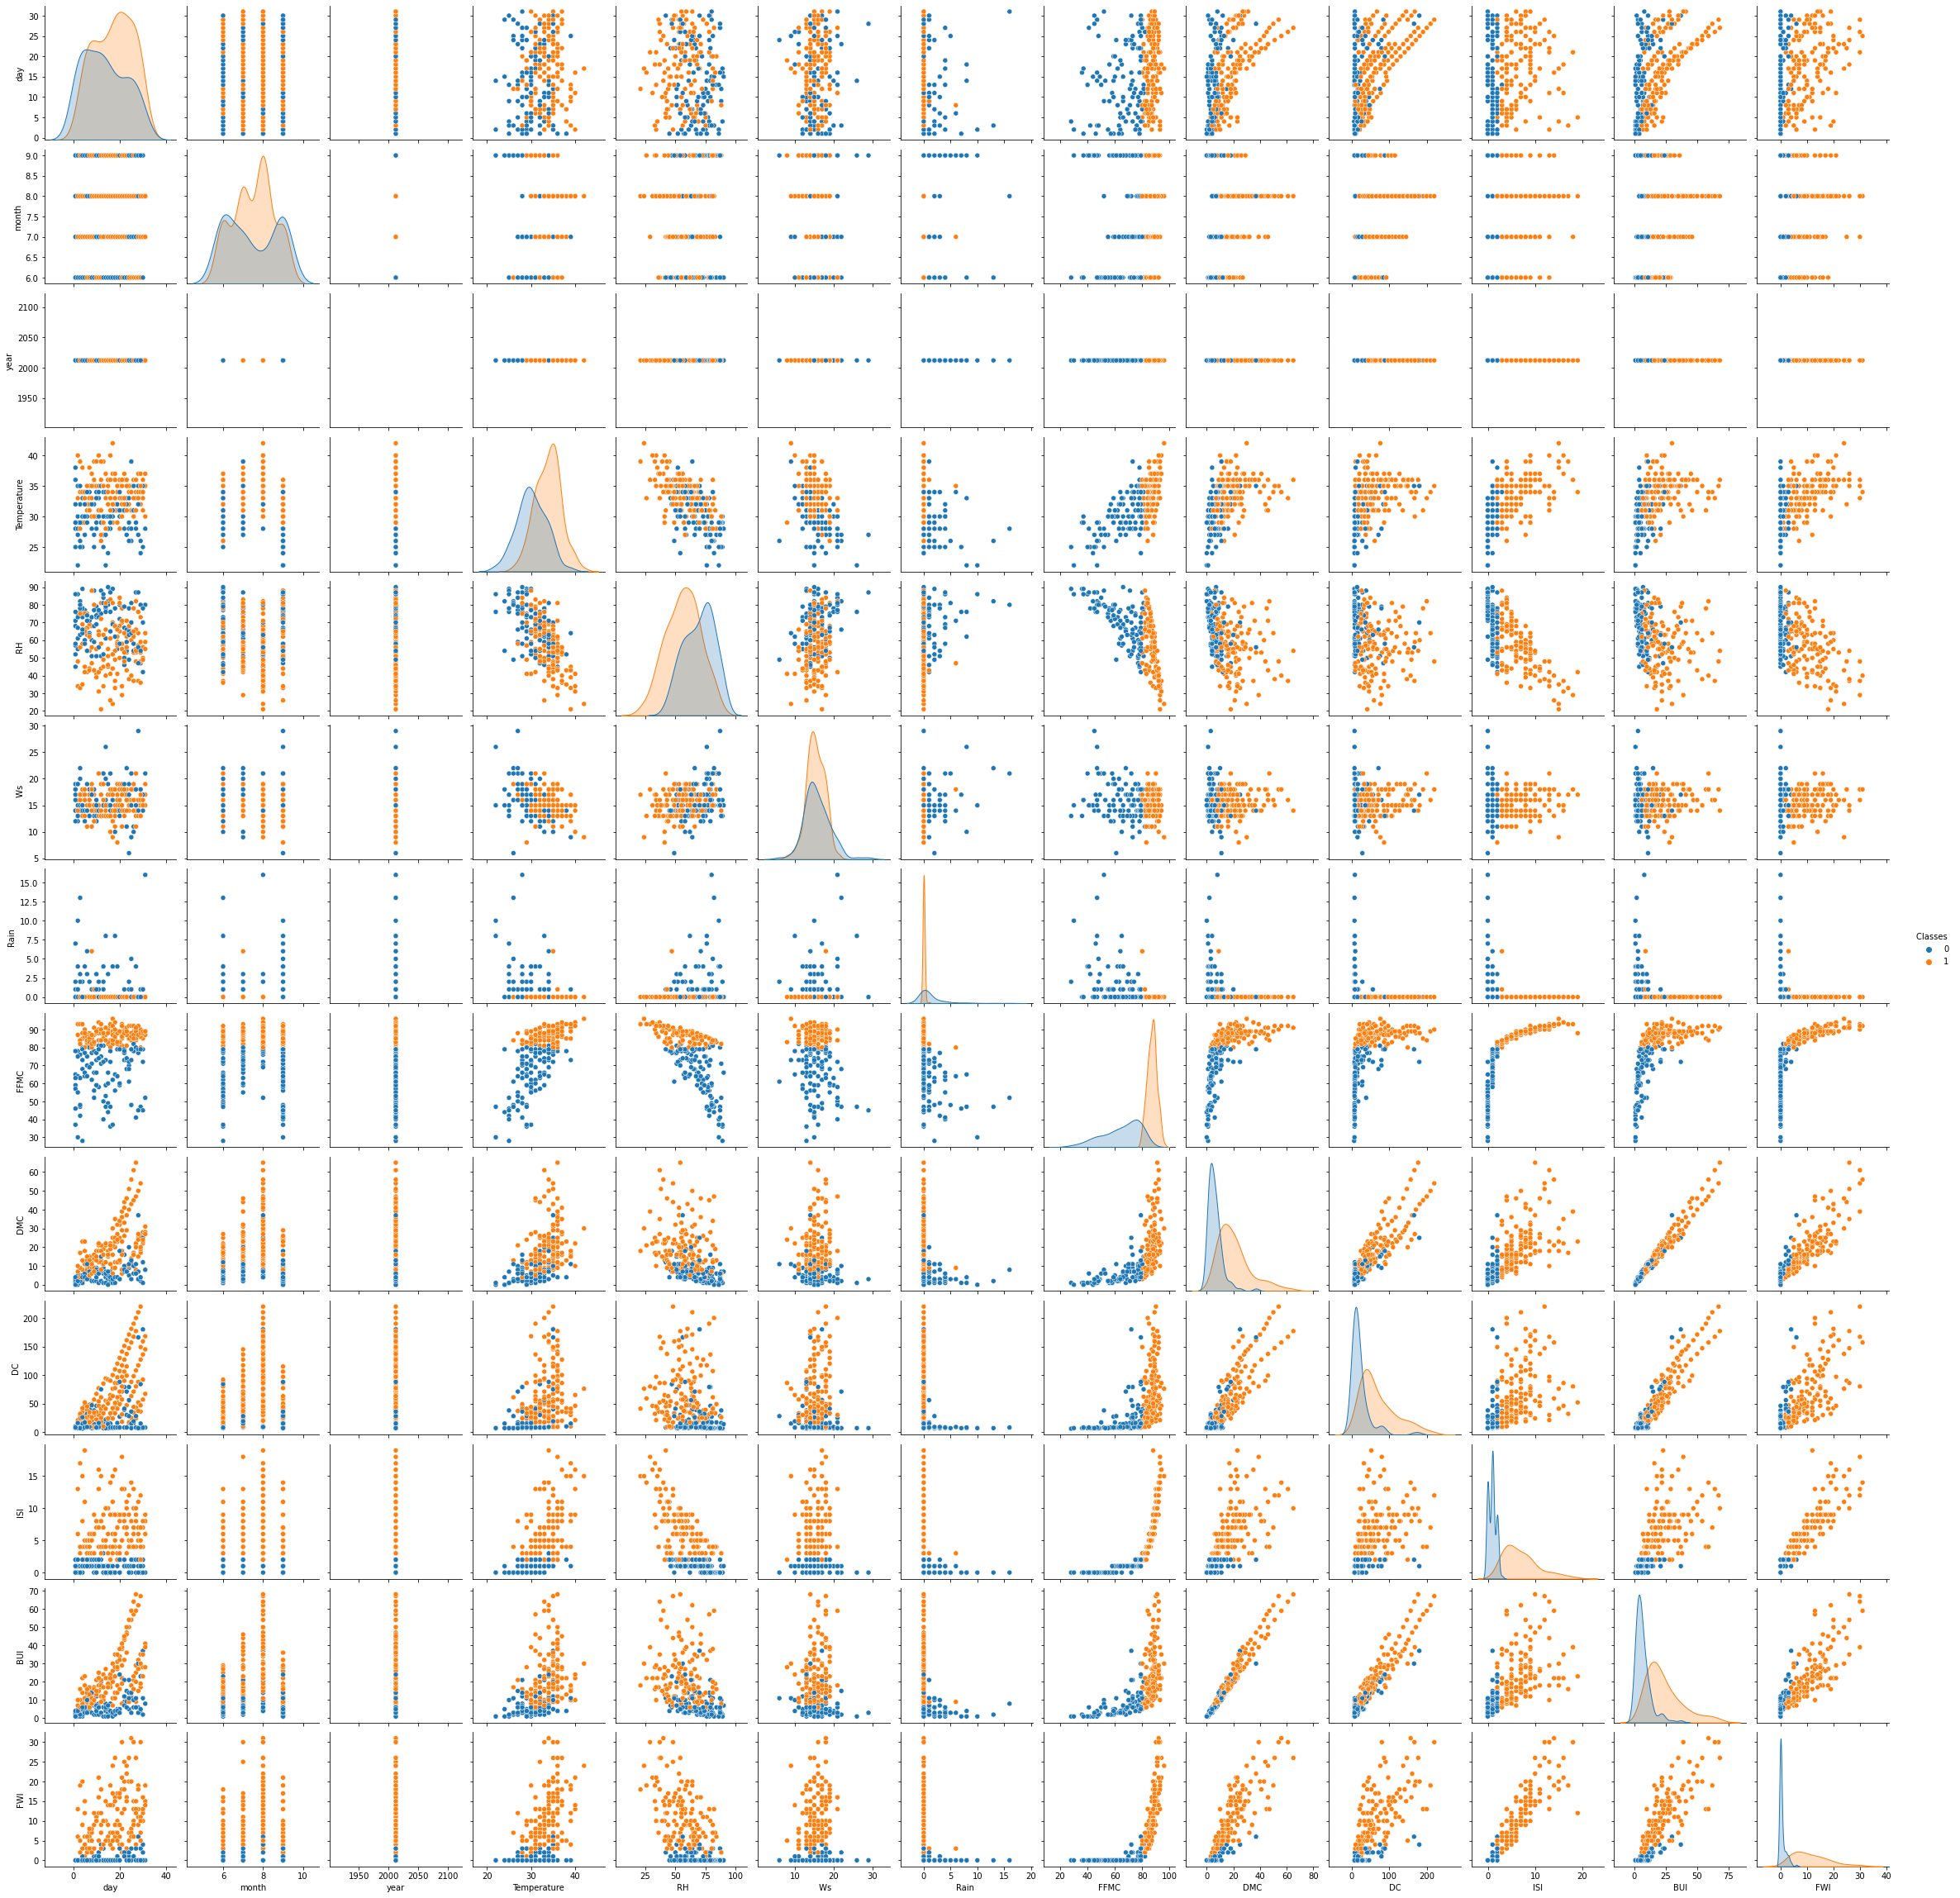

In [29]:
plt.figure(figsize=(20,20))
sns.pairplot(df, hue = 'Classes  ')

In [ ]:
#Classification model building

In [39]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [32]:
## Train Test Split

feature_columns = ['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']
predicted_class = ['Classes  ']

In [33]:
# Split-out validation dataset

X = df[feature_columns].values
y = df[predicted_class].values

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size = 0.30, random_state=10)

#Test Harness
We will use stratified 10-fold cross validation to estimate model accuracy.

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

Stratified means that each fold or split of the dataset will aim to have the same distribution of example by class as exist in the whole training dataset.

In [ ]:
#Build Models
Let’s test 5 different algorithms:

Logistic Regression (LR)
K-Nearest Neighbors (KNN).
Classification and Regression Trees (CART).
Gaussian Naive Bayes (NB).
Support Vector Machines (SVM).

In [34]:
#Logistic Regression (LR)
from sklearn.linear_model import LogisticRegression
lgr_models = LogisticRegression(random_state=0)
lgr_models.fit(X_train, Y_train)


LogisticRegression(random_state=0)

In [35]:
#Accuracy
predict_train_data = lgr_models.predict(X_validation)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(Y_validation, predict_train_data)))

Accuracy = 0.918


In [36]:
predict_train_data

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [43]:
# Check Accuracy of KNN,CART,NB,SVM Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.869485 (0.074247)
CART: 0.964706 (0.047059)
NB: 0.934559 (0.032957)
SVM: 0.591912 (0.028525)


In [ ]:
#Random forest Accuracy 

In [40]:
models = []
models.append(('RF',RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RF: 0.982353 (0.026956)


In [ ]:
#Select Best Model
Random forest has the largest accuracy score at about 0.9823 or 99%.
Logistic regression has estimated accuracy score at about 0.918 or 92%.
Now create a plot of the model evaluation results and compare the spread and the mean accuracy of each model.
There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (via 10 fold-cross validation).

A useful way to compare the samples of results for each algorithm is to create a box and whisker plot for each distribution and compare the distributions.

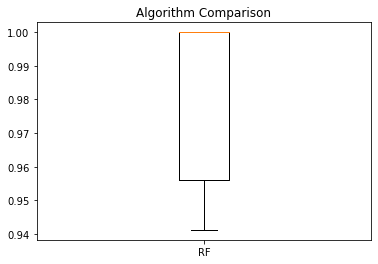

In [41]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
""" We can see that the box and whisker plots are squashed at the top of the range, with many evaluations achieving 100% accuracy, 
and some pushing down into the high 96% accuracies."""

In [ ]:
#Make Predictions
We must choose an algorithm to use to make predictions.

The results in the previous section suggest that the Logistic regression has the largest estimated accuracy 
score at about 0.9689 or 97%.
so I will use this model as our final model.

Now to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. 
It is valuable to keep a validation set just in case you made a slip during training, 
such as overfitting to the training set or a data leak. Both of these issues will 
result in an overly optimistic result.

In [45]:
#Make Predictions

# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [46]:
#Evaluate Predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9315068493150684
[[27  0]
 [ 5 41]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.92        27
           1       1.00      0.89      0.94        46

    accuracy                           0.93        73
   macro avg       0.92      0.95      0.93        73
weighted avg       0.94      0.93      0.93        73



In [ ]:
""" We can see that the accuracy is 0.92 or about 92% on the hold out dataset.
The confusion matrix provides an indication of the errors made.

Finally, the classification report provides a breakdown of each class by precision, 
recall, f1-score and support showing excellent results 


In [ ]:
##Regression model building

In [ ]:
#Regression
#Linear, Lasso, and Ridge Regression with scikit-learn 
#linear regression, 
#ridge regression and 
#lasso regression, 
#SVR, 
#Decision tree regressor and 
#random forest regressor

In [47]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error

<AxesSubplot:xlabel='total_forest_values', ylabel='DMC'>

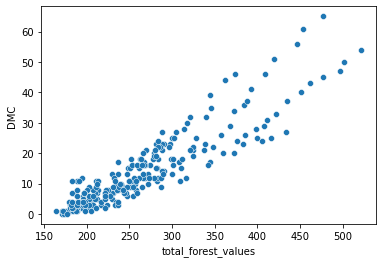

In [48]:
#LinearRegression
df['total_forest_values'] = df['Temperature'] + df[' RH'] + df[' Ws']+ df['Rain ']+ df['FFMC']+ df['Classes  ']+ df['DC']+ df['ISI']+ df['BUI']+ df['FWI'] 
sns.scatterplot(data=df, x='total_forest_values', y='DMC')

In [ ]:
#from above output DMC-Duff Moisture Code (DMC) index from the FWI system is the target value 

In [49]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,total_forest_values
0,1,6,2012,29,57,18,0,65,3,7,1,3,0,0,180
1,2,6,2012,29,61,13,1,64,4,7,1,3,0,0,179
2,3,6,2012,26,82,22,13,47,2,7,0,2,0,0,199
3,4,6,2012,25,89,13,2,28,1,6,0,1,0,0,164
4,5,6,2012,27,77,16,0,64,3,14,1,3,0,0,202


In [50]:
X = df.drop(['DMC','total_forest_values','Classes  '], axis=1)
X

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0,65,7,1,3,0
1,2,6,2012,29,61,13,1,64,7,1,3,0
2,3,6,2012,26,82,22,13,47,7,0,2,0
3,4,6,2012,25,89,13,2,28,6,0,1,0
4,5,6,2012,27,77,16,0,64,14,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
240,25,9,2012,28,70,15,0,79,36,2,14,3
241,26,9,2012,30,65,14,0,85,44,4,16,6
242,27,9,2012,28,87,15,4,41,8,0,6,0
243,28,9,2012,27,87,29,0,45,7,0,3,0


In [51]:
df.drop('total_forest_values', axis = 1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65,3,7,1,3,0,0
1,2,6,2012,29,61,13,1,64,4,7,1,3,0,0
2,3,6,2012,26,82,22,13,47,2,7,0,2,0,0
3,4,6,2012,25,89,13,2,28,1,6,0,1,0,0
4,5,6,2012,27,77,16,0,64,3,14,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,25,9,2012,28,70,15,0,79,13,36,2,14,3,0
241,26,9,2012,30,65,14,0,85,16,44,4,16,6,1
242,27,9,2012,28,87,15,4,41,6,8,0,6,0,0
243,28,9,2012,27,87,29,0,45,3,7,0,3,0,0


In [52]:
y = df['DMC']
y

0       3
1       4
2       2
3       1
4       3
       ..
240    13
241    16
242     6
243     3
244     4
Name: DMC, Length: 242, dtype: int32

In [53]:
#Build, Predict and Evaluate the Regression Model
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size = 0.30, random_state=10)

In [54]:
lr_model = LinearRegression()

In [55]:
lr_model.fit(X_train, Y_train)

LinearRegression()

In [56]:
y_pred = lr_model.predict(X_validation)
y_pred

array([38.27888162,  9.55401151,  3.94399814,  3.8534448 ,  0.77219703,
       12.00348037, 19.79206307, 21.8125914 , 19.10765322,  5.69964178,
        3.09698025,  3.29585106, 15.81329964, 28.45443713, 10.43995667,
        1.75655081, 28.46917338, 26.24588797, 36.19136184, 17.84796164,
       16.3107221 , 10.09453537, 21.22818873,  8.02475128, 10.22136556,
       11.84408413,  2.08236616,  5.08025228, 40.232205  , 10.19906243,
       24.20114309, 14.4291256 , 17.77276617,  2.87152686,  1.68581226,
        8.35809132,  6.73661525, 16.23279956, 21.77064748,  2.42330453,
       14.01307096, 27.23149486, 11.51492155, 47.63447715,  7.74655324,
       32.62516205,  5.87777495, 10.3033833 ,  5.82830947, 11.95478416,
        1.59239623, 15.7988346 , 22.34306336,  8.16308296, 12.02345751,
        3.03988975,  1.29118089,  2.50787228, 13.62855769, 11.69215764,
       17.07294499, 22.55843762,  9.33930115,  8.72521354, 18.1039416 ,
        9.68499629, 12.93064528, 59.32966309,  7.97650952,  9.74

In [57]:
lr_model.coef_

array([ 4.74363048e-03,  2.71137064e-02,  1.11022302e-16, -3.32859268e-03,
       -1.19851645e-02,  5.40162872e-03, -4.59678440e-02, -1.10478900e-02,
       -1.35700458e-01, -6.02554990e-02,  1.25681998e+00,  6.21219379e-02])

In [58]:
y_pred[0]

38.278881621899615

In [59]:
df['DMC'].mean() #average of DMC-Duff Moisture Code (DMC) index

14.256198347107437

In [60]:
mean_absolute_error(Y_validation, y_pred ) 


0.8825377891462012

In [61]:
mean_squared_error(Y_validation, y_pred)

6.729136405464801

In [62]:
np.sqrt(mean_squared_error(Y_validation, y_pred))

2.594057903259833

In [ ]:
"""If there is lot of difference between MAE and RMSE then it means your model is performing well on most of the points nearby but not far away points.
"""

In [63]:
pred_train_lr= lr_model.predict(X_train)
print(np.sqrt(mean_squared_error(Y_train,pred_train_lr)))
print(r2_score(Y_train, pred_train_lr))

pred_test_lr= lr_model.predict(X_validation)
print(np.sqrt(mean_squared_error(Y_validation,pred_test_lr))) 
print(r2_score(Y_validation, pred_test_lr))

0.7998563258805441
0.9959928501631761
2.594057903259833
0.9511122333979699


In [ ]:
#output for trainning data shows that the RMSE is 0.799,R-squared value is 99.5%
#output for test data RMSE is 2.5, R-squared value is 96%

In [ ]:
#Ridge Regression

In [64]:
#Regularized Regression-Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X_train,Y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(Y_train,pred_train_rr)))
print(r2_score(Y_train, pred_train_rr))

pred_test_rr= rr.predict(X_validation)
print(np.sqrt(mean_squared_error(Y_validation,pred_test_rr))) 
print(r2_score(Y_validation, pred_test_rr))

0.7998563262631868
0.9959928501593421
2.5940497145048353
0.9511125420489916


In [ ]:
#RMSE and R-squared values for the Ridge Regression model on the training data is 0.799 and 99 percent,
#For the test data, the result for these metrics RMSE and R-squared values are 2.59 thousand and 96 percent.

In [ ]:
#Lasso Regression

In [65]:
#Lasso Regression
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, Y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(Y_train,pred_train_lasso)))
print(r2_score(Y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_validation)
print(np.sqrt(mean_squared_error(Y_validation,pred_test_lasso))) 
print(r2_score(Y_validation, pred_test_lasso))

0.8004635212065089
0.9959867639546874
2.589287262989877
0.9512918835815415


In [ ]:
#The above output shows that the RMSE and R-squared values for the Lasso Regression model on the training data is 0.80 and 99%
#for the test data is 2.58  and 96 percent, respectively. 
#Lasso Regression can also be used for feature selection because the coeﬃcients of less important features are reduced to zero.

In [ ]:
#Decision Tree for Multioutput Regression

In [66]:
#Decision Tree for Multioutput Regression

from sklearn.tree import DecisionTreeRegressor
# define model
model = DecisionTreeRegressor()
# fit model
model.fit(X_train, Y_train)
# make a prediction
y_predict = model.predict((X_validation))

In [67]:
y_predict
print('Prediction: %d' % y_predict[0])

Prediction: 46


In [68]:
#Model Evaluation using R-Square for Decision Tree Regression
from sklearn import metrics
r_square = metrics.r2_score(Y_validation, y_predict)
print('R-Square Error associated with Decision Tree Regression is:', r_square)

R-Square Error associated with Decision Tree Regression is: 0.9356094275727054


In [70]:
#MAE# evaluate multioutput regression model with k-fold cross-validation
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from numpy import mean
from numpy import std

# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 1.993 (0.411)


In [ ]:
#SVR 

In [71]:
#SVR 

#Support vector regressor with linear kernel
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(X_train, Y_train) 
#Test score
svr_linear.score(X_validation,Y_validation)

0.9502773769291097

In [72]:
#Linear regression as a baseline to cross check or compare 
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,Y_train)
linear.score(X_validation,Y_validation)

0.9511122333979699

In [ ]:
#Both Support vector regressor with linear kernel and Linear regression test score are same. 

In [73]:
#Support vector regressor with Gaussian (radial basis function) kernel
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(X_train, Y_train) 
svr_rbf.score(X_validation,Y_validation)
#Very low value 

-0.05114043098802323

In [74]:
#RMSE 
from sklearn.metrics import mean_squared_error
print("RMSE for linear SVR:",np.sqrt(mean_squared_error(Y_validation,svr_linear.predict(X_validation))))
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(Y_validation,svr_rbf.predict(X_validation))))

RMSE for linear SVR: 2.6161135064594228
RMSE for RBF kernelized SVR: 12.028457494171496


In [75]:
#We can do a grid search of hyperparameters (with 5-fold cross-validation) 
#to see if the test/validation score be improved
from sklearn.model_selection import GridSearchCV
params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.5,1]}
grid = GridSearchCV(svr_rbf,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)
grid.fit(X_train,Y_train)
#Check which was deemed best estimator by the grid search
grid.best_estimator_
#Fit that estimator to the data and see
svr_best=SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.5)
svr_best.fit(X_train,Y_train)
svr_best.score(X_validation,Y_validation)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


0.04331054753085872

In [76]:
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(Y_validation,svr_best.predict(X_validation))))

RMSE for RBF kernelized SVR: 11.475326741848747


In [ ]:
#Random Forest for Regression

In [77]:
#Random Forest for Regression

# evaluate random forest ensemble for regression
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

# define the model
model = RandomForestRegressor()

# fit the model on the whole dataset
model.fit(X_train, Y_train)
# make a prediction
#Predicted temperature from test dataset w.r.t Random Forest Regression
y_predict_rfr = model.predict((X_validation))
print('Prediction: %d' % y_predict_rfr[0])

#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics
r_square = metrics.r2_score(Y_validation, y_predict_rfr)
print('R-Square Error associated with Random Forest Regression is:', r_square)

Prediction: 45
R-Square Error associated with Random Forest Regression is: 0.9553623652366436


In [78]:
# define the model
model = RandomForestRegressor()

# fit the model on the whole dataset
model.fit(X_train, Y_train)
# make a prediction
#Predicted temperature from test dataset w.r.t Random Forest Regression
y_predict_rfr = model.predict((X_validation))
print('Prediction: %d' % y_predict_rfr[0])

Prediction: 45


In [79]:
#MAE #Random Forest for Regression
#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics
r_square = metrics.r2_score(Y_validation, y_predict_rfr)
print('R-Square Error associated with Random Forest Regression is:', r_square)

# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_validation, Y_validation, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

R-Square Error associated with Random Forest Regression is: 0.9578494635368666
MAE: -2.131 (1.299)


In [ ]:
#Summary
In classification I choosen the Random forest algaritham because 
The results in the previous section suggest that the Random forest algaritham has the largest estimated accuracy 
score at about 0.9889 or 99%.
so I used this model as our final model for deployement.


#FOR REGRESSION 

#Linear Regression Model: Test set RMSE of 2.5 thousand and R-square of 96% percent.

#Ridge Regression Model: Test set RMSE of 2.5 thousand and R-square of 96% percent.

#Lasso Regression Model: Test set RMSE of 2.5 thousand and R-square of 96 % percent.
#All regression models are performing better with a decent R-squared and stable RMSE values.
#The most ideal result would be an RMSE value of zero and R-squared value of 1, 
#but that's almost impossible in real economic datasets.

#R-Square Error associated with Decision Tree Regression is:0.935
#R-Square Error associated with Random Forest Regression is: 0.957
#Support vector regressor 
#SVR-RMSE for linear SVR: 2.616
#SVR-RMSE for RBF kernelized SVR: 12.028